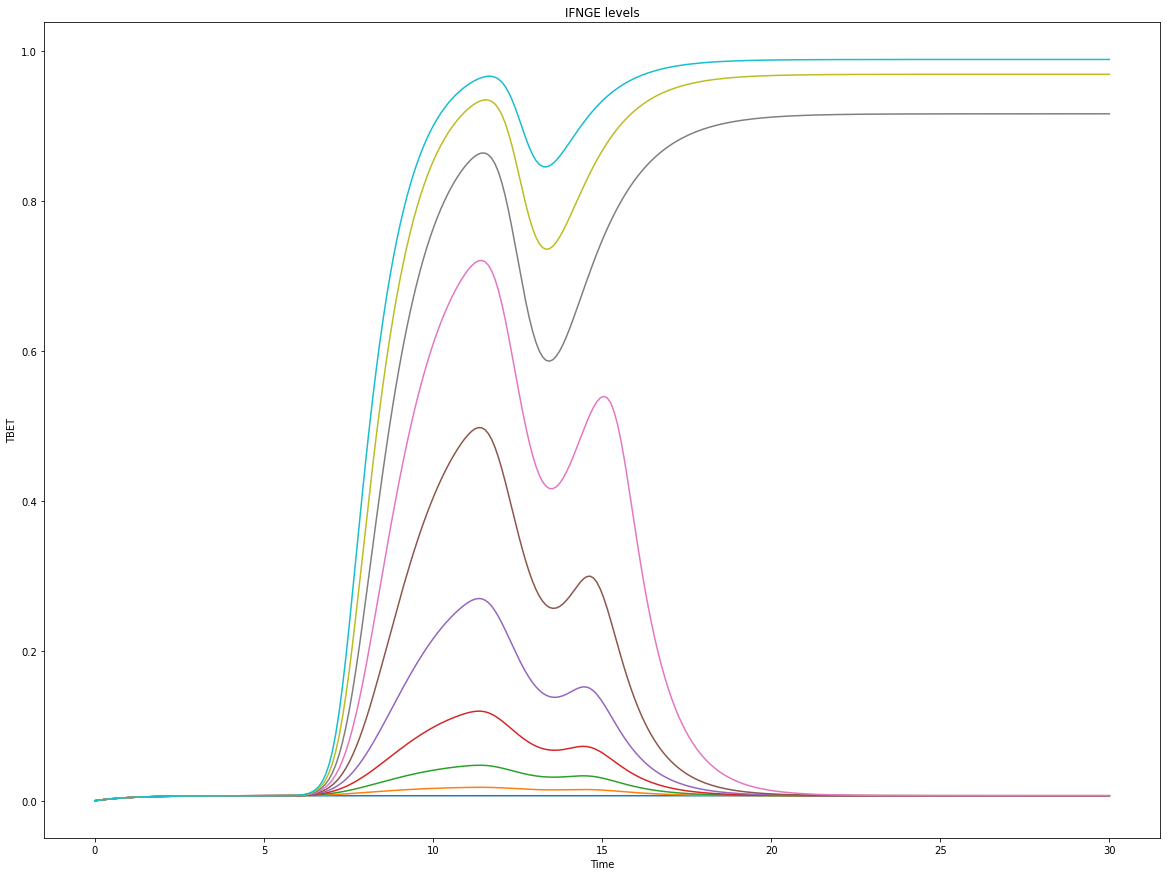

In [ ]:
# Programa en Python para la simulación de activación, diferenciación y metabolismo de células T CD4. 
# V 1.1
# Dr. David Martínez Méndez.
# Ciudad de México, 16 de Julio de 2021. Universidad Nacional Autónoma de México.
# davidmm@fisica.unam.mx

#Paqueterías:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from math import e


def odes(x, t, IFNGE):

    # Tasas de decaimiento
    DCTLA4 = 1
    DCTLA4DIM = 1
    DTCR = 1
    DCD28 = 1
    DAP1 = 1
    DCD25 = 1
    DIL2G = 1
    DMTOR = 1
    DZAP70 = 1
    DSTAT5 = 1
    DNFAT = 1
    DNFKB = 1
    DAKT = 1
    DBCL2 = 1
    DNDRG1 = 1
    DDAG = 1
    DSOS = 1
    DRASGTPR = 1
    DLCK = 1
    DPDK1 = 1
    DLAT = 1
    DPLC = 1
    DPIP2 = 1
    DPIP3 = 1
    DCA = 1
    DPKC = 1
    DTBET = 1
    DIFNG = 1
    DGATA3 = 1
    DIL4 = 1
    DFOXP3 = 1
    DIL10 = 1
    DTGFB = 1
    DRORGT = 1
    DIL21 = 1
    DIL17 = 1
    DMTORC1 = 1
    DMTORC2 = 1
    DLKB1 = 1
    DAMPK = 1
    DGlycolysis = 1
    DOXPHOS = 1
    DAMPATPratio = 1

    # Inputs
    # Tasa de saturación de respuesta
    b = 10

    # Settings de presentación (afinidad y tiempo)
    AttAnt = 1
    TAnt = 15

    # Settings de co-estimulación (afinidad y tiempo)
    AttCD8086 = 1
    TCD8086 = 15
    
    # Settings de citocinas externas inductoras de fenotipos
    
    IL12E = 1
    IL4E = 1
    TGFBE = 1
    IL10E = 1
    IL21E = 1

    # Settings de fármacos
    metformin = 0
    adiponectin = 0
    quercitin = 0
    resveratrol = 0

    # Asignar cada elemento de la red a un elemento vector 
    # (OJO. mantener siempre el mismo orden en todas las listas en adelante)
    TCR = x[0]
    CD28 = x[1]
    AP1 = x[2]
    CD25 = x[3]
    IL2G = x[4]
    MTOR = x[5]
    ZAP70 = x[6]
    STAT5 = x[7]
    NFAT = x[8]
    NFKB = x[9]
    AKT = x[10]
    CTLA4 = x[11]
    CTLA4DIM = x[12]
    BCL2 = x[13]
    NDRG1 = x[14]
    DAG = x[15]
    SOS = x[16]
    RASGTPR = x[17]
    LCK = x[18]
    PDK1 = x[19]
    LAT = x[20]
    PLC = x[21]
    PIP2 = x[22]
    PIP3 = x[23]
    CA = x[24]
    PKC = x[25]
    TBET = x[26]
    IFNG = x[27]
    GATA3 = x[28]
    IL4 = x[29]
    FOXP3 = x[30]
    IL10 = x[31]
    TGFB = x[32]
    RORGT = x[33]
    IL21 = x[34]
    IL17 = x[35]
    MTORC1 = x[36]
    MTORC2 = x[37]
    LKB1 = x[38]
    AMPK = x[39]
    Glycolysis = x[40]
    OXPHOS = x[41]
    AMPATPratio = x[42]

    # Funciones para presentación y co-estimulación
    Antigen = AttAnt / (1 + e ** (+ 1 * (t - TAnt)))
    CD8086 = AttCD8086 / (1 + e ** (+ 1 * (t - TCD8086)))

    # Funciones difusas
    WTCR = Antigen * (1 - CTLA4DIM)
    WCD28 = CD8086 * (1 - CTLA4DIM)
    WAP1 = RASGTPR
    WCD25 = IL2G * (1 - CTLA4DIM)
    WIL2G = NFAT * AP1 * (1 - NDRG1)
    WMTOR = CD25 + AKT - CD25 * AKT
    WZAP70 = TCR * LCK * (1 - CTLA4DIM)
    WSTAT5 = CD25 * (1 - CTLA4DIM)
    WNFAT = CA
    WNFKB = PKC
    WAKT = (CD28 * (1 - CTLA4DIM) + PDK1) - (CD28 * (1 - CTLA4DIM) * PDK1)
    WCTLA4 = IL2G * ZAP70
    WCTLA4DIM = (CTLA4 * CD8086) + (FOXP3 * TGFB) - (CTLA4 * CD8086) * (FOXP3 * TGFB)
    WBCL2 = AKT
    WNDRG1 = NFAT * (1 - AKT)
    WDAG = PLC
    WSOS = CD28
    WRASGTPR = (LAT * SOS * DAG) + (CD25 * DAG) - (LAT * SOS * DAG)*(CD25 * DAG)
    WLCK = TCR * (1 - CTLA4DIM)
    WPDK1 = (CD25 + CD28) - (CD25 * CD28)
    WLAT = ZAP70
    WPLC = (ZAP70 + CD25) - (ZAP70 * CD25)
    WPIP2 = PLC
    WPIP3 = PIP2
    WCA = PIP3
    WPKC = DAG
    WTBET = (IL12E * IFNGE * MTORC1 * NFKB * NFAT * AP1) * (1 - IL4) * (1 - IL10) * (1 - GATA3)
    WIFNG = TBET * AP1 * NFAT
    WGATA3 = (IL4E * MTORC2 * STAT5 * NFAT) * (1 - TBET) * (1 - TGFB) * (1 - IFNG)
    WIL4 = (GATA3 * (1 - TBET)) * (1 - IFNG)
    WFOXP3 = ((TGFBE * IL10E * NFAT * STAT5 * AP1 * IL2G) + (TGFBE * IL10E * IL10 * CTLA4) + (TGFBE * TGFB) -
                        (TGFBE * IL10E * NFAT * STAT5 * AP1 * IL2G) * (TGFBE * IL10E * IL10 * CTLA4) * (TGFBE * TGFB) ) * (1 - IFNG)
    WIL10 = TGFBE * FOXP3
    WTGFB = FOXP3
    WRORGT = (IL21E * TGFBE * AP1 * MTORC1) * (1 - TBET) * (1 - FOXP3) * (1 - GATA3)
    WIL21 = (IL21E * RORGT) * (1 - IFNG) * (1 - IL4) * (1 - IL10)
    WIL17 = RORGT
    WMTORC1 = MTOR * (1 - AMPK)
    WMTORC2 = MTOR * AMPK
    WLKB1 = (AKT * AMPATPratio) + (quercitin * resveratrol) - (AKT * AMPATPratio) * (quercitin * resveratrol)
    WAMPK = (LKB1 * (1 - MTORC1)) + (CA * AMPATPratio * (1 - MTORC1)) + (AKT * AMPATPratio *
                (1 - MTORC1)) + FOXP3 + metformin + adiponectin - (LKB1 * (1 - MTORC1)) * (CA * AMPATPratio *
                 (1 - MTORC1)) * (AKT * AMPATPratio * (1 - MTORC1)) * FOXP3 * metformin * adiponectin
    WGlycolysis = MTORC1 * (1 - AMPATPratio)
    WOXPHOS = AMPK
    WAMPATPratio = Glycolysis * (1 - OXPHOS)
   
    # Definir cada ecuación diferencial
    dTCRdt = 1 / (1 + e ** (-b * (WTCR - .5))) - DTCR * TCR
    dCD28dt = 1 / (1 + e ** (-b * (WCD28 - .5))) - DCD28 * CD28
    dAP1dt = 1 / (1 + e ** (-b * (WAP1 - .5))) - DAP1 * AP1
    dCD25dt = 1 / (1 + e ** (-b * (WCD25 - .5))) - DCD25 * CD25
    dIL2Gdt = 1 / (1 + e ** (-b * (WIL2G - .5))) - DIL2G * IL2G
    dMTORdt = 1 / (1 + e ** (-b * (WMTOR - .5))) - DMTOR * MTOR
    dZAP70dt = 1 / (1 + e ** (-b * (WZAP70 - .5))) - DZAP70 * ZAP70
    dSTAT5dt = 1 / (1 + e ** (-b * (WSTAT5 - .5))) - DSTAT5 * STAT5
    dNFATdt = 1 / (1 + e ** (-b * (WNFAT - .5))) - DNFAT * NFAT
    dNFKBdt = 1 / (1 + e ** (-b * (WNFKB - .5))) - DNFKB * NFKB
    dAKTdt = 1 / (1 + e ** (-b * (WAKT - .5))) - DAKT * AKT
    dCTLA4dt = 1 / (1 + e ** (-b * (WCTLA4 - .5))) - DCTLA4 * CTLA4
    dCTLA4DIMdt = 1 / (1 + e ** (-b * (WCTLA4DIM - .5))) - DCTLA4DIM * CTLA4DIM
    dBCL2dt = 1 / (1 + e ** (-b * (WBCL2 - .5))) - DBCL2 * BCL2
    dNDRG1dt = 1 / (1 + e ** (-b * (WNDRG1 - .5))) - DNDRG1 * NDRG1
    dDAGdt = 1 / (1 + e ** (-b * (WDAG - .5))) - DDAG * DAG
    dSOSdt = 1 / (1 + e ** (-b * (WSOS - .5))) - DSOS * SOS
    dRASGTPRdt = 1 / (1 + e ** (-b * (WRASGTPR - .5))) - DRASGTPR * RASGTPR
    dLCKdt = 1 / (1 + e ** (-b * (WLCK - .5))) - DLCK * LCK
    dPDK1dt = 1 / (1 + e ** (-b * (WPDK1 - .5))) - DPDK1 * PDK1
    dLATdt = 1 / (1 + e ** (-b * (WLAT - .5))) - DLAT * LAT
    dPLCdt = 1 / (1 + e ** (-b * (WPLC - .5))) - DPLC * PLC
    dPIP2dt = 1 / (1 + e ** (-b * (WPIP2 - .5))) - DPIP2 * PIP2
    dPIP3dt = 1 / (1 + e ** (-b * (WPIP3 - .5))) - DPIP3 * PIP3
    dCAdt = 1 / (1 + e ** (-b * (WCA - .5))) - DCA * CA
    dPKCdt = 1 / (1 + e ** (-b * (WPKC - .5))) - DPKC * PKC
    dTBETdt = 1 / (1 + e ** (-b * (WTBET - .5))) - DTBET * TBET
    dIFNGdt = 1 / (1 + e ** (-b * (WIFNG - .5))) - DIFNG * IFNG
    dGATA3dt = 1 / (1 + e ** (-b * (WGATA3 - .5))) - DGATA3 * GATA3
    dIL4dt = 1 / (1 + e ** (-b * (WIL4 - .5))) - DIL4 * IL4
    dFOXP3dt = 1 / (1 + e ** (-b * (WFOXP3 - .5))) - DFOXP3 * FOXP3
    dIL10dt = 1 / (1 + e ** (-b * (WIL10 - .5))) - DIL10 * IL10
    dTGFBdt = 1 / (1 + e ** (-b * (WTGFB - .5))) - DTGFB * TGFB
    dRORGTdt = 1 / (1 + e ** (-b * (WRORGT - .5))) - DRORGT * RORGT
    dIL21dt = 1 / (1 + e ** (-b * (WIL21 - .5))) - DIL21 * IL21
    dIL17dt = 1 / (1 + e ** (-b * (WIL17 - .5))) - DIL17 * IL17
    dMTORC1dt = 1 / (1 + e ** (-b * (WMTORC1 - .5))) - DMTORC1 * MTORC1
    dMTORC2dt = 1 / (1 + e ** (-b * (WMTORC2 - .5))) - DMTORC2 * MTORC2
    dLKB1dt = 1 / (1 + e ** (-b * (WLKB1 - .5))) - DLKB1 * LKB1
    dAMPKdt = 1 / (1 + e ** (-b * (WAMPK - .5))) - DAMPK * AMPK
    dGlycolysisdt = 1 / (1 + e ** (-b * (WGlycolysis - .5))) - DGlycolysis * Glycolysis
    dOXPHOSdt = 1 / (1 + e ** (-b * (WOXPHOS - .5))) - DOXPHOS * OXPHOS
    dAMPATPratiodt = 1 / (1 + e ** (-b * (WAMPATPratio - .5))) - DAMPATPratio * AMPATPratio

    return [dTCRdt, dCD28dt, dAP1dt, dCD25dt, dIL2Gdt, dMTORdt, dZAP70dt, dSTAT5dt, dNFATdt, dNFKBdt, dAKTdt, dCTLA4dt,
            dCTLA4DIMdt, dBCL2dt, dNDRG1dt, dDAGdt, dSOSdt, dRASGTPRdt, dLCKdt, dPDK1dt,  dLATdt,
            dPLCdt, dPIP2dt, dPIP3dt, dCAdt, dPKCdt, dTBETdt, dIFNGdt, dGATA3dt, dIL4dt, dFOXP3dt, dIL10dt, dTGFBdt,
            dRORGTdt, dIL21dt, dIL17dt, dMTORC1dt, dMTORC2dt, dLKB1dt, dAMPKdt, dGlycolysisdt, dOXPHOSdt, dAMPATPratiodt]

# Condiciones iniciales para cada ODE (seguir orden)
x0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0.2, 0]

# Solución:
# Declarar un vector de tiempo para la solución de ODEs
t = np.linspace(0, 30, 300)
IFNGEs = np.linspace(0, 1, 10)
# Evaluar todos los vectores en forma de matriz de resultados "x"
for IFNGEix in IFNGEs:
  x = odeint(odes, x0, t, args=(IFNGEix,))
  TCR = x[:, 0]
  CD28 = x[:, 1]
  AP1 = x[:, 2]
  CD25 = x[:, 3]
  IL2G = x[:, 4]
  MTOR = x[:, 5]
  ZAP70 = x[:, 6]
  STAT5 = x[:, 7]
  NFAT = x[:, 8]
  NFKB = x[:, 9]
  AKT = x[:, 10]
  CTLA4 = x[:, 11]
  CTLA4DIM = x[:, 12]
  BCL2 = x[:, 13]
  NDRG1 = x[:, 14]
  DAG = x[:, 15]
  SOS = x[:, 16]
  RASGTPR = x[:, 17]
  LCK = x[:, 18]
  PDK1 = x[:, 19]
  LAT = x[:, 20]
  PLC = x[:, 21]
  PIP2 = x[:, 22]
  PIP3 = x[:, 23]
  CA = x[:, 24]
  PKC = x[:, 25]
  TBET = x[:, 26]
  IFNG = x[:, 27]
  GATA3 = x[:, 28]
  IL4 = x[:, 29]
  FOXP3 = x[:, 30]
  IL10 = x[:, 31]
  TGFB = x[:, 32]
  RORGT = x[:, 33]
  IL21 = x[:, 34]
  IL17 = x[:, 35]
  MTORC1 = x[:, 36]
  MTORC2 = x[:, 37]
  LKB1 = x[:, 38]
  AMPK = x[:, 39]
  Glycolysis = x[:, 40]
  OXPHOS = x[:, 41]
  AMPATPratio = x[:, 42]

  plt.rcParams['figure.figsize'] = [20, 15]
  plt.plot(t, TBET)
  plt.xlabel("Time")
  plt.ylabel("TBET")
  plt.title("IFNGE levels")
  plt.savefig("Test")
plt.show()